In [1]:
!pip install prophet


In [2]:
import pandas as pd

# Load our dataset (replace 'your_dataset.csv' with your actual file name)
df = pd.read_csv('ProductForecast.csv')

# Displaying the first few rows of the original dataset
print("Original Dataset:")
display(df.head())

Original Dataset:


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


09:46:45 - cmdstanpy - INFO - Chain [1] start processing
09:46:46 - cmdstanpy - INFO - Chain [1] done processing
/Users/abhinavsharma/anaconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/abhinavsharma/anaconda3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


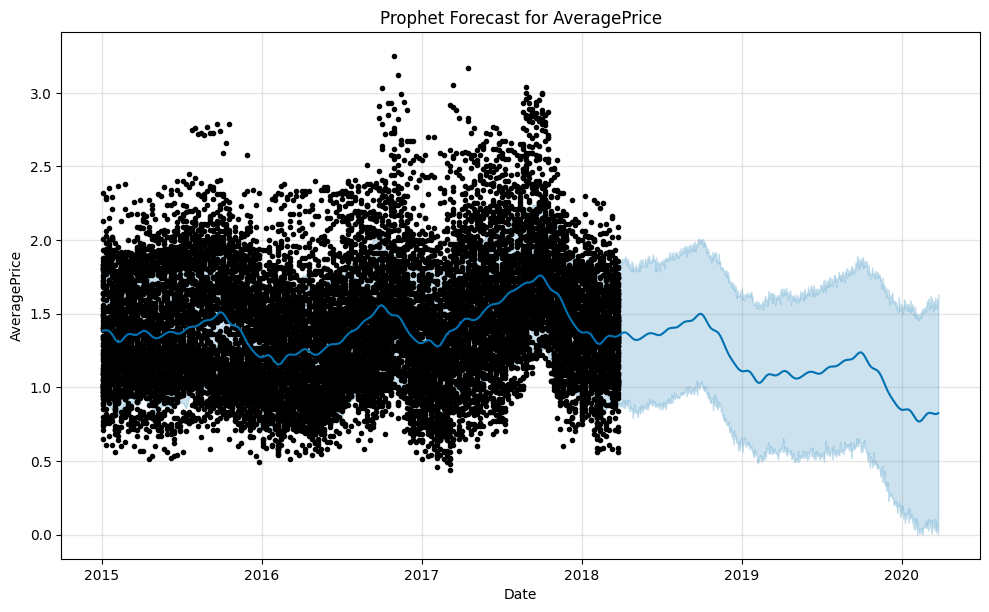

In [5]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Loading our dataset
# Assuming our DataFrame is named 'df'
# Maing sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Renaming the columns as expected by Prophet ('ds' for date and 'y' for the target variable)
df1 = df[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Creating and fitting the Prophet model
model = Prophet()
model.fit(df1)

# Create a DataFrame with future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=365 * 2, freq='D')

# Generate forecasts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast for AveragePrice')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.show()


In [6]:
# Extract data for 'conventional' type and 'Albany' region
albany_conventional_data = df[(df['type'] == 'conventional') & (df['region'] == 'Albany')]

# Display the extracted data
print("\nFiltered Data for 'conventional' type and 'Albany' region:")
display(albany_conventional_data.head())




Filtered Data for 'conventional' type and 'Albany' region:


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
# for specific region

/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_65485/4143282010.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  albany_conventional_data['Date'] = pd.to_datetime(albany_conventional_data['Date'])
11:03:00 - cmdstanpy - INFO - Chain [1] start processing
11:03:00 - cmdstanpy - INFO - Chain [1] done processing
/Users/abhinavsharma/anaconda3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/abhinavsharma/anaconda3/lib/python3.10/site-packages/prophet/p

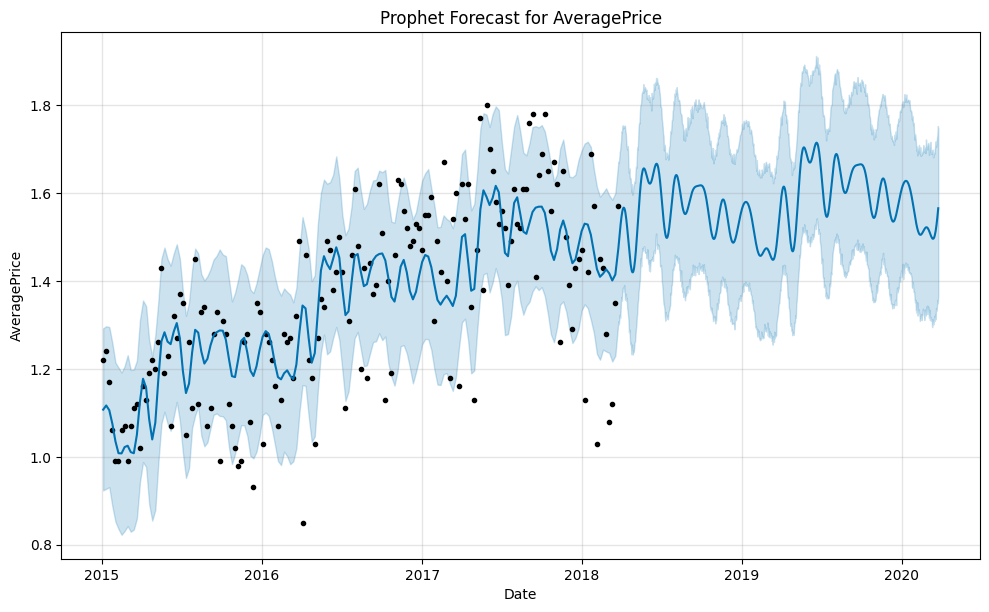

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your dataset (substitute 'albany_conventional_data' with your actual DataFrame name)
# Make sure the 'Date' column is in datetime format
albany_conventional_data['Date'] = pd.to_datetime(albany_conventional_data['Date'])

# Rename the columns as expected by Prophet ('ds' for date and 'y' for the target variable)
df1 = albany_conventional_data[['Date', 'AveragePrice']].rename(columns={'Date': 'ds', 'AveragePrice': 'y'})

# Creating and fitting the Prophet model
model = Prophet()
model.fit(df1)

# Create a DataFrame with future dates for prediction (next 2 years)
future = model.make_future_dataframe(periods=365 * 2, freq='D')

# Generate forecasts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast for AveragePrice')
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.show()
